In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [3]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
ClassLabels=[]
file_name='labels.txt'
with open(file_name,'rt') as f:
    ClassLabels=f.read().rstrip('\n').split('\n')
print(ClassLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [5]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0000013FCD7C7E10>

# Read Image

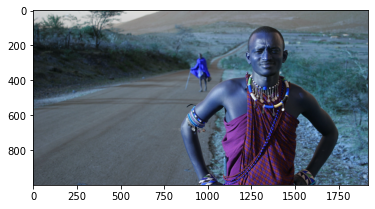

In [6]:
img=cv2.imread('image.jpg')
plt.imshow(img)

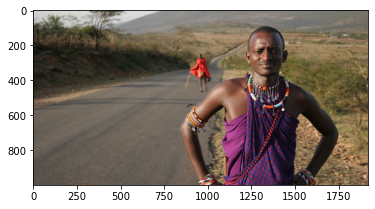

In [7]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [8]:
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5)
print(ClassIndex)

[1]


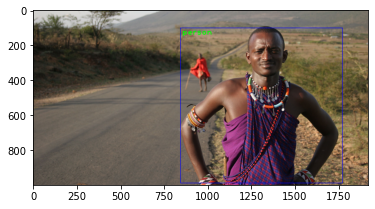

In [9]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,ClassLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)


plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))    

# Webcam demo

In [ ]:
cap=cv2.VideoCapture(1)

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame=cap.read()
    ClassIndex,confidence,bbox=model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,ClassLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    cv2.imshow('object detection',frame)
    
    if cv2.waitKey(1)==27 & 0xFF==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

[1]
[1]
[1]
[1]
[1]
[ 1 72]
[1]
[ 1 62 62]
[ 1 62]
[1]
[1]
[ 1 72]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[1]
[1]
[1]
[ 1 62]
[ 1 62]
[1]
[ 1 62]
[1]
[1]
[1]
[ 1 62]
[1]
[ 1 62]
[1]
[1]
[1]
[ 1 62]
[ 1 62]
[1]
[ 1 62]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[ 1 62]
[ 1 62]
[ 1 62]
[1]
[1]
[1]
[ 1 72]
[1]
[1]
[1]
[ 1 62 62]
[ 1 62 62]
[ 1 62]
[ 1 62 62]
[ 1 62 62]
[ 1 62]
[1]
[ 1 62]
[ 1 32]
[ 1 62 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62 62]
[ 1 62]
[ 1 62 62]
[ 1 62 62]
[ 1 62 62]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[ 1 62]
[ 1 62]
[ 1 62]
[1]
[ 1 62]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]

[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77 77  1 62]
[77 77  1 62]
[77  1 62 77]
[77  1 77 62]
[77 77  1 62]
[77 77  1 62]
[77  1 77 62]
[77  1 77 62]
[77  1 62]
[77  1 62]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1 75]
[77  1]
[77  1]
[77  1 75]
[77  1 75]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1 75]
[77  1]
[77  1]
[77  1 77]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[ 1 77]
[1]
[ 1 73]
[1]
[1]
[ 1 77]
[ 1 77]
[ 1 77]
[1]
[ 1 77]
[ 1 77]
[77  1]
[ 1

[ 1 77]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[ 1 77]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1 62]
[77  1]
[77  1]
[77  1 73]
[77  1 73]
[77  1 73]
[77  1 73]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[ 1 77]
[77  1]
[ 1 77]
[ 1 77]
[ 1 77 73]
[ 1 77]
[ 1 77 73]
[ 1 77 73]
[ 1 77]
[77  1]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[77  1]
[77  1]
[77  1]
[ 1 77]
[ 1 77]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[ 1 77]
[ 1 77]
[77  1]
[77  1]
[77  1]
[ 1 77]
[77  1]
[ 1 77]
[77  1]
[77  1]
[ 1 77]
[77  1]
[ 1 77]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1 73]
[77  1 73]
[77  1 73]
[77  1]
[77  1 73]
[77  1]
[ 1 77]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1 73]
[

[ 1 77]
[ 1 77]
[1]
[ 1 77]
[ 1 73]
[ 1 73]
[ 1 77]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[1]
[ 1 73]
[ 1 73]
[1]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 73]
[ 1 73]
[ 1 73]
[1]
[1]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[1]
[ 1 73]
[1]
[ 1 73]
[1]
[ 1 73]
[1]
[1]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 73]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 73]
[ 1 73]
[1]


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


[ 1 62]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[ 1 62]
[1]
[ 1 62]
[1]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[ 1 62]
[1]
[ 1 62]
[1]
[ 1 62]
[1]
[ 1 62]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[ 1 62]
[ 1 62]
[1]
[ 1 62]
[ 1 62 62]
[ 1 62 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[77  1]
[77  1]
[77  1]
[77  1]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[1]
[ 1 77]
[ 1 77]
[77  1]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 77]
[ 1 77]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 77]
[1]
[1]
[1]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[1]
[1]
[1]
[1]
[1]
[ 1 77]
[1]
[1]
[1]
[1]
[1]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[1]
[ 1 77]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


[ 1 77]
[ 1 77]
[1]
[ 1 77]
[ 1 77 73]
[ 1 73]
[ 1 73]
[ 1 73 77]
[73  1 77]
[ 1 73]
[73  1 77]
[ 1 73]
[ 1 73]
[ 1 73]
[1]
[1]
[1]
[1]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[77  1 73]
[ 1 77 73]
[77  1 73]
[77  1 73]
[77  1 73]
[ 1 77 73]
[77  1 73]
[77  1 73]
[77  1 73]
[77  1]
[77  1 73]
[77  1 73]
[77  1]
[77  1]
[77  1 73]
[77  1 73]
[77  1 73]
[77  1 73]
[77  1 73]
[77  1 73]
[ 1 77]
[77  1 73]
[77  1 73]
[77  1 73]
[77  1 73]
[77  1 73]
[77 73  1]
[77 73  1]
[77  1 73]
[77 73  1]
[77 73  1]
[77 73  1]
[77  1 73]
[77 73  1]
[77  1 73]
[77 73  1]
[77  1 73]
[77 73  1]
[77  1 73]
[77  1 73]
[77  1 73]
[77  1 73]
[77  1 73]
[77  1 73]
[77  1]
[77  1 73]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[ 1 77]
[77  1]
[ 1 77]
[77  1]
[ 1 77 73]
[ 1 77]
[ 1 77 73]
[ 1 77]
[1]
[1]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[1]
[1]
[1]
[ 1 62]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
